In [1]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt

# import random
# from time import time
# from IPython.display import display, HTML
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.model_selection import ParameterGrid
from sklearn.neural_network import MLPClassifier

import seaborn as sns

In [2]:
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [4]:

# 0 represents Airplane and 9 represents Truck
numPixel = x_train.shape[1]*x_train.shape[2]
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
numtr = x_train.shape[0]
numts = x_test.shape[0]
print(numtr, 'train samples')
print(numts, 'test samples')

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
60000 train samples
10000 test samples


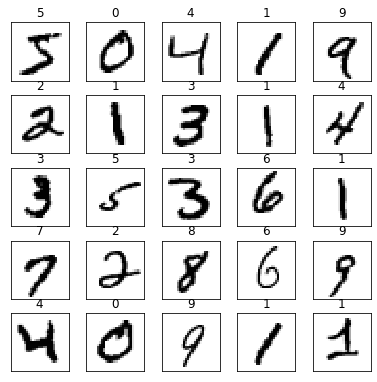

In [5]:
# Visualizing some images
fig = plt.figure(figsize=(5, 5))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.3) #Adjust the subplot layout parameters

for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i,:,:], cmap=plt.cm.binary, interpolation='nearest')
    ax.set_title(y_train[i])

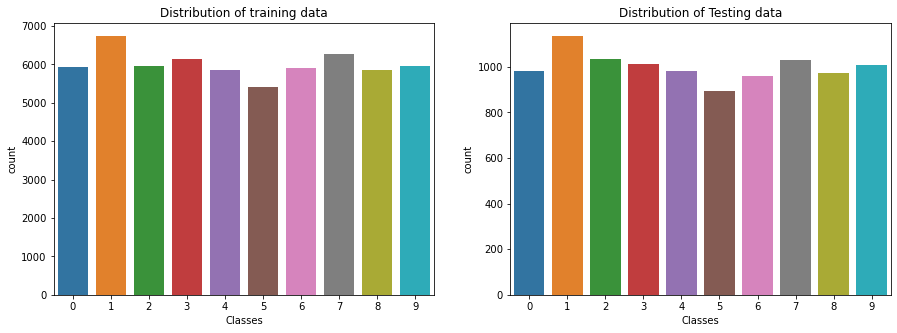

In [6]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [16]:
#MLPClassifier(hidden_layer_sizes=100, activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', 
#learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, 
#tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
#validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
mlp = MLPClassifier(early_stopping=True, verbose=True)
mlp.fit(x_train.reshape(numtr,numPixel), y_train)

Iteration 1, loss = 3.80299480
Validation score: 0.903833
Iteration 2, loss = 1.31412808
Validation score: 0.913333
Iteration 3, loss = 0.77279183
Validation score: 0.918000
Iteration 4, loss = 0.50398939
Validation score: 0.929500
Iteration 5, loss = 0.34651860
Validation score: 0.928500
Iteration 6, loss = 0.26832805
Validation score: 0.932167
Iteration 7, loss = 0.21093938
Validation score: 0.939500
Iteration 8, loss = 0.16185701
Validation score: 0.933333
Iteration 9, loss = 0.15182327
Validation score: 0.941333
Iteration 10, loss = 0.12423820
Validation score: 0.941667
Iteration 11, loss = 0.11378322
Validation score: 0.939000
Iteration 12, loss = 0.10399776
Validation score: 0.942500
Iteration 13, loss = 0.11247536
Validation score: 0.945167
Iteration 14, loss = 0.10210451
Validation score: 0.945833
Iteration 15, loss = 0.09071137
Validation score: 0.946167
Iteration 16, loss = 0.09720956
Validation score: 0.948500
Iteration 17, loss = 0.08468206
Validation score: 0.954833
Iterat

MLPClassifier(early_stopping=True, verbose=True)

In [12]:
accuracy_score(y_test, mlp.predict(x_test.reshape(numts,numPixel))) # Test Accuracy

0.9668

In [13]:
print("Training set score: %f" % mlp.score(x_train.reshape(numtr,numPixel), y_train))
print("Test set score: %f" % mlp.score(x_test.reshape(numts,numPixel), y_test))

Training set score: 0.995450
Test set score: 0.966800


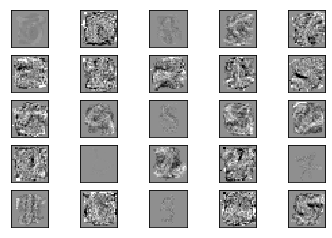

In [14]:
# Visualization of first layer MLP weights on MNIST

fig, axes = plt.subplots(5, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [15]:
mlp.coefs_[0].shape

(784, 100)